# MSDS 422 - Practical Machine Learning - Week 6 - Assignment

##### Author: Jason De Melo - 2/13/2022

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
from collections import Counter
from datetime import datetime
from sklearn.model_selection import train_test_split #, cross_val_predict
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix #, roc_curve, auc, precision_recall_curve

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Load Files and split the train and test data

In [2]:
global_random_state = 42 

data = pd.read_csv("train.csv")

X = data.drop(['label'], axis=1)
y = data['label'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=global_random_state)

data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [3]:
np.array(X_train.iloc[0]).reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  63,
        253, 121,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  63,
        254, 202,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 163,
        255, 144,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 167,
        251,  26,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

## EDA Training and Test Datasets

* Imported 33600 examples for training and 8400 examples for test 
* Imported 33600 labels for training and 8400 labels for test 

In [4]:
print('x_train:\t{}'.format(X_train.shape))
print('y_train:\t{}'.format(y_train.shape))
print('x_test:\t\t{}'.format(X_test.shape))
print('y_test:\t\t{}'.format(y_test.shape))

x_train:	(33600, 784)
y_train:	(33600,)
x_test:		(8400, 784)
y_test:		(8400,)


#### Frequency of each label in the training and test data

In [5]:
Counter(y_train).most_common()

[(1, 3775),
 (7, 3508),
 (3, 3414),
 (6, 3352),
 (9, 3350),
 (2, 3331),
 (0, 3316),
 (4, 3233),
 (8, 3228),
 (5, 3093)]

In [6]:
Counter(y_test).most_common()

[(3, 937),
 (1, 909),
 (7, 893),
 (2, 846),
 (4, 839),
 (9, 838),
 (8, 835),
 (0, 816),
 (6, 785),
 (5, 702)]

#### Plot examples

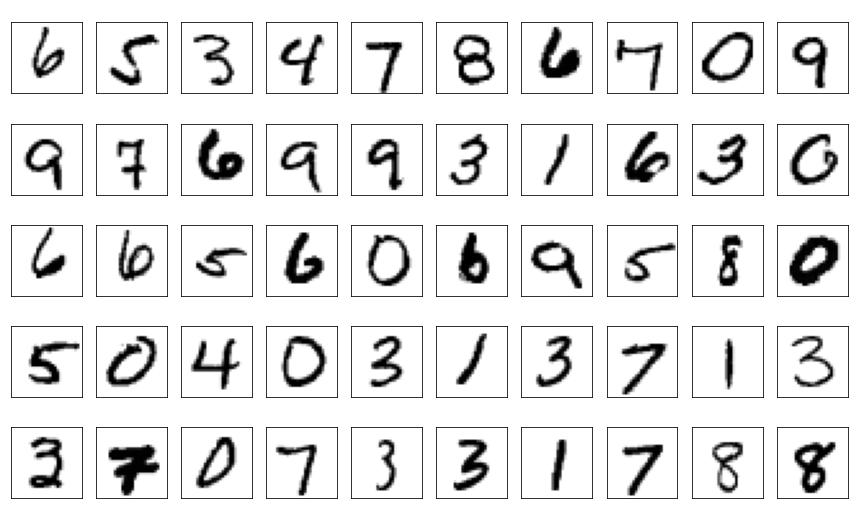

In [7]:
fig = plt.figure(figsize = (15, 9))

for i in range(50):
    plt.subplot(5, 10, 1+i)
    plt.title(np.array(y_train)[i], color='white')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array(X_train.iloc[i]).reshape(28,28), cmap='binary')

## Preprocessing Data

#### One Hot Encoding Labels

We will change the way this label is represented from a class name or number, to a vector of all possible classes with all the classes set to 0 except the one which this example belongs to - which will be set to 1. For example:


| original label | one-hot encoded label |
|------|------|
| 5 | [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] |
| 7 | [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] |
| 1 | [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] |

In [8]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

print("First ten entries of y_train:\n{}\n".format(y_train[0:10]))
print("First ten rows of one-hot y_train:\n {}".format(y_train_encoded[0:10,]))

First ten entries of y_train:
34941    6
24433    5
24432    3
8832     4
30291    7
28009    8
27876    6
120      7
30457    0
4634     9
Name: label, dtype: int64

First ten rows of one-hot y_train:
 [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [9]:
print('y_train_encoded shape: ', y_train_encoded.shape)
print('y_test_encoded shape: ', y_test_encoded.shape)

y_train_encoded shape:  (33600, 10)
y_test_encoded shape:  (8400, 10)


#### Preprocessing the training data
It is not required to use numpy to unroll the examples from (28, 28) arrays to (784, 1) vectors. 
The data obtained from Kaggle comes with the correct shape.

In [10]:
print('X_train:\t{}'.format(X_train.shape))
print('X_test:\t\t{}'.format(X_test.shape))

X_train:	(33600, 784)
X_test:		(8400, 784)


#### Scaling the data
1. Each element in each example is a pixel value
2. Pixel values range from 0 to 255
3. 0 = Black
4. 255 = White

In [11]:
np.set_printoptions(linewidth=(28*4+1))
print("{}".format(np.array(X_train.iloc[2020])))

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0 107 147 147 182 209 235 147 140  39   8   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0  28 235 254 254 254 254 254 254 254 254 199 129  26   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0  38 253 254 184 140 140 140 140 147 249 253 254 234  94   1   0   0   0   0   0   0   0   0   0   0
   0   0   0   0 153 160   0   0   0   0   0   0   0  81 208 254 254 144  14   0   0   0   0   0

In [12]:
X_train_scaled = X_train.astype('float32') / 255
X_test_scaled = X_test.astype('float32') / 255

## Auxiliary Functions

In [13]:
def create(input_shape=[784], units=[784, 128, 10], optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']) -> Sequential:
    # We use a Sequential class defined in Keras to create our model. All the layers are going to be Dense layers. 
    # This means, like our examples above, all the nodes of a layer would be connected to all the nodes of the 
    # preceding layer i.e. densely connected.
    model = Sequential(Dense(name="input_layer", input_shape=input_shape, units=units[0], activation=tf.nn.relu))
    for i in range(1, len(units)-1):
        model.add(Dense(name=f"hidden_layer_{i}", units=units[i], activation=tf.nn.relu))

    model.add(Dense(name="output_layer", units=units[len(units)-1], activation=tf.nn.softmax))  # Softmax activiation function, since the target variable is multi-classified
    
    # Compile the model
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    # Display the model
    model.summary()
    return model

def fit(model, X, y, X_val=None, y_val=None, epochs=10, name=None):
    # Fit the model and calculate the elapsed time
    params = {}
    if X_val is not None and y_val is not None:
        params['validation_data'] = (X_val, y_val)
   
    start=datetime.now()
    history = model.fit(X, y, epochs=epochs, **params ) #validation_data=(X_val, y_val))
    end=datetime.now()
    elapsed = end - start
    elapsed = elapsed.seconds + elapsed.microseconds / 1000000

    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
    # Get the number of nodes from the first hidden layer
    nodes = len(model.layers[0].weights[0][0]) # Initialize with number of input units
    for layer in model.layers:
        if 'hidden_layer' in layer.name:
            nodes = len(layer.weights[0][0])
            break

    accuracy = history.history['accuracy'].pop()
    val_accuracy = history.history['val_accuracy'].pop()

    result = {'Layers' : len(model.layers), 'Nodes' : nodes, 'Time' : f'{elapsed:.2f}', 
              'Training Accuracy' : f'{accuracy:.4f}', 'Validation Accuracy' : f'{val_accuracy:.4f}'}

    return result

def plot_confusion_matrix(matrix, tick_labels):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    ax.set_xlabel("Predicted Classes")
    ax.set_ylabel("Actual Classes")
    ax.set_xticklabels(tick_labels, minor=True)
    ax.set_yticklabels(tick_labels, minor=True)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

def evaluate(model, X, y):
    y_pred = model.predict(X)
    y_pred_classes = np.argmax(y_pred, axis=-1)
    y_classes = np.argmax(y, axis=-1)
    cm = tf.math.confusion_matrix(y_classes, y_pred_classes)
    plot_confusion_matrix(cm, np.unique(y_classes)) #[0,1,2,3,4,5,6,7,8,9])

    # plt.matshow(cm, cmap=plt.cm.gray)
    # plt.xlabel("Predicted Classes")
    # plt.ylabel("Actual Classes")
    # plt.show()


def save_file(X, y, file_name):
    labels = np.argmax(y, axis=1)
    submission = {'ImageId' : (X.index + 1).to_list(), 'label' : labels}
    df_submission = pd.DataFrame(submission)
    df_submission.set_index('ImageId', inplace=True)
    df_submission.to_csv(file_name)

## Testing the Models

In [14]:
test = pd.read_csv("test.csv")
test_scaled = test.astype('float32') / 255

## Create the Models

#### 1 input layer (128 nodes), 1 output layer

In [15]:
model_101 = create(units=[128, 10])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
1050/1050 [==============================] - 6s 5ms/step - loss: 0.3150 - accuracy: 0.9091 - val_loss: 0.2001 - val_accuracy: 0.9426
Epoch 2/10
1050/1050 [==============================] - 6s 6ms/step - loss: 0.1522 - accuracy: 0.9546 - val_loss: 0.1521 - val_accuracy: 0.9573
Epoch 3/10
1050/1050 [==============================] - 6s 5ms/step - loss: 0.1082 - accuracy: 0.9684 - val_loss: 0.1271 - val_accuracy: 0.9654
Epoch 4/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0859 - accuracy: 0.9754 - val_loss: 0.1157 - val_accuracy: 0.9669
Epoch 5/10
1050/1050 [==============================] - 7s 6ms/step - loss: 0.0694 - accuracy: 0.9792 - val_loss: 0.1156 - val_accuracy: 0.9696
Epoch 6/10
1050/1050 [==============================] - 7s 6ms/step - loss: 0.0578 - accuracy: 0.9833 - val_loss: 0.1126 - val_accuracy: 0.9692
Epoch 7/10
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0479 - accuracy: 0.9863 - val_loss: 0.1092 - val_accuracy:

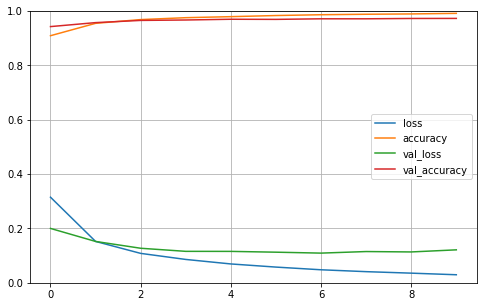

In [16]:
result_101 = fit(model=model_101, X=X_train_scaled, y=y_train_encoded, X_val=X_test_scaled, y_val=y_test_encoded, epochs=10)

In [17]:
y_pred = model_101.predict(test_scaled)
save_file(test_scaled, y_pred, "submission101.csv")

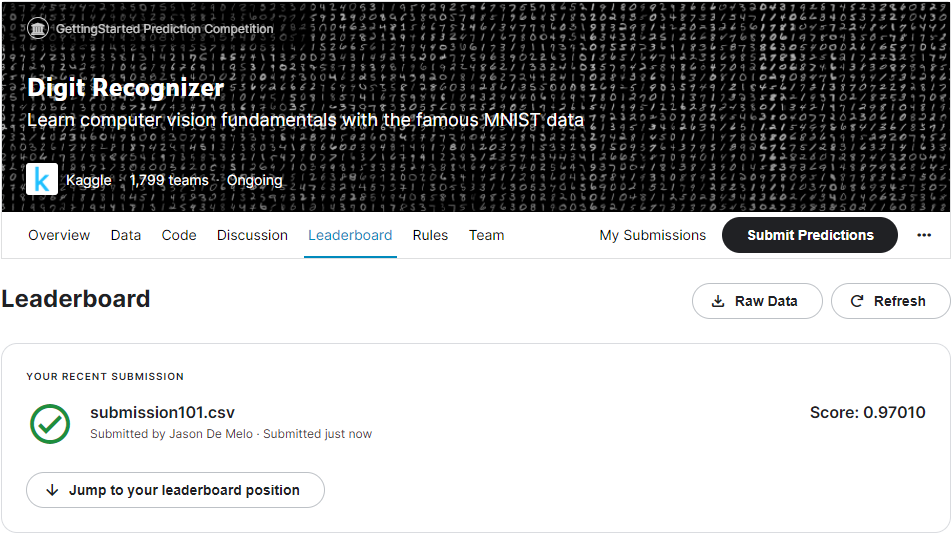

In [18]:
result_101['Test Accuracy (Kaggle)'] = 0.97107
Image("submission101.png")

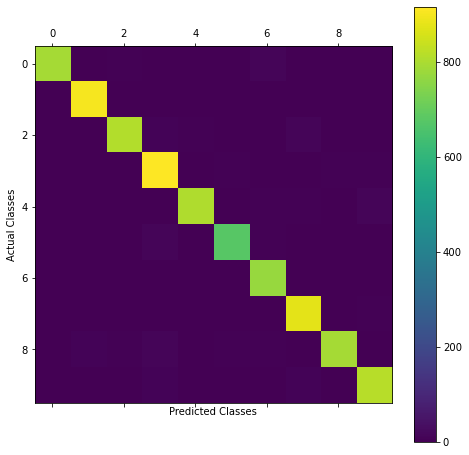

In [19]:
# Confusion matrix
evaluate(model_101, X_test_scaled, y_test_encoded)

#### 1 Input layer (300 nodes), 1 hidden layer (128 nodes), 1 output layer

In [20]:
model_121 = create(units=[300, 128, 10])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 300)               235500    
                                                                 
 hidden_layer_1 (Dense)      (None, 128)               38528     
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 275,318
Trainable params: 275,318
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
1050/1050 [==============================] - 10s 8ms/step - loss: 0.2530 - accuracy: 0.9245 - val_loss: 0.1560 - val_accuracy: 0.9537
Epoch 2/10
1050/1050 [==============================] - 8s 8ms/step - loss: 0.1058 - accuracy: 0.9675 - val_loss: 0.1236 - val_accuracy: 0.9644
Epoch 3/10
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0735 - accuracy: 0.9773 - val_loss: 0.1060 - val_accuracy: 0.9715
Epoch 4/10
1050/1050 [==============================] - 7s 7ms/step - loss: 0.0560 - accuracy: 0.9831 - val_loss: 0.1383 - val_accuracy: 0.9673
Epoch 5/10
1050/1050 [==============================] - 7s 6ms/step - loss: 0.0421 - accuracy: 0.9879 - val_loss: 0.1137 - val_accuracy: 0.9748
Epoch 6/10
1050/1050 [==============================] - 6s 5ms/step - loss: 0.0358 - accuracy: 0.9900 - val_loss: 0.1487 - val_accuracy: 0.9690
Epoch 7/10
1050/1050 [==============================] - 6s 5ms/step - loss: 0.0297 - accuracy: 0.9918 - val_loss: 0.1252 - val_accuracy

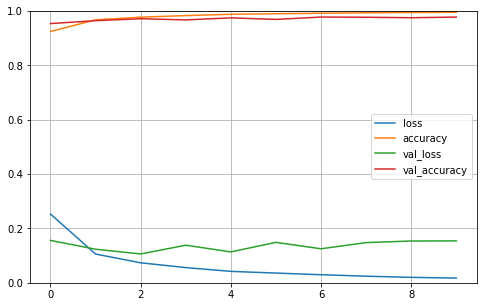

In [21]:
result_121 = fit(model=model_121, X=X_train_scaled, y=y_train_encoded, X_val=X_test_scaled, y_val=y_test_encoded, epochs=10)

In [22]:
y_pred = model_121.predict(test_scaled)
save_file(test_scaled, y_pred, "submission121.csv")

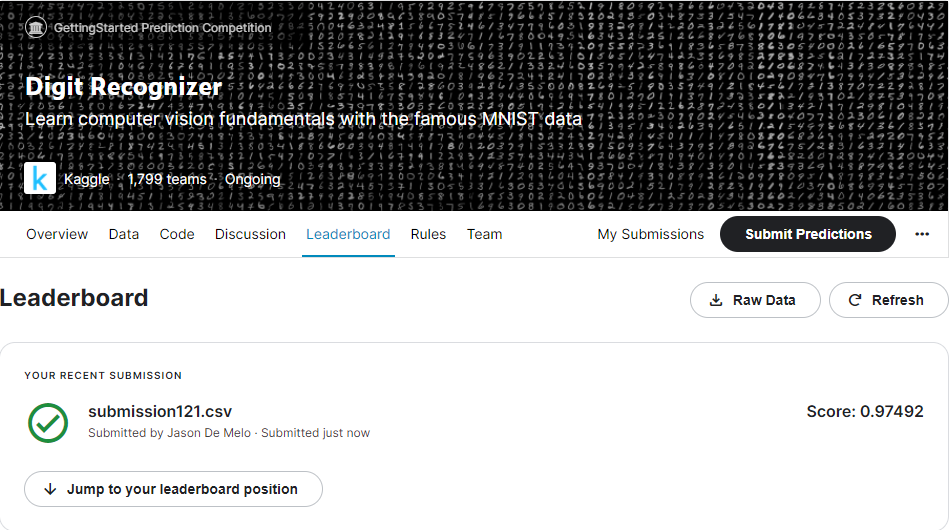

In [23]:
result_121['Test Accuracy (Kaggle)'] = 0.97492
Image("submission121.png")

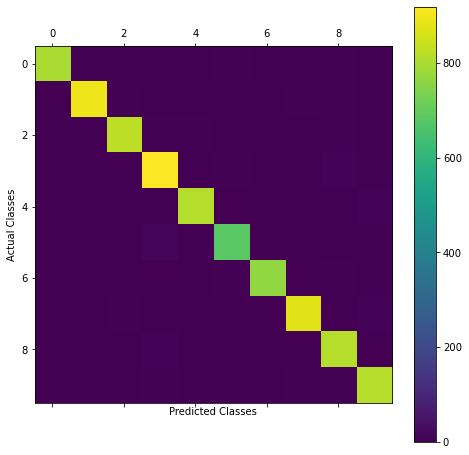

In [24]:
# Confusion matrix
evaluate(model_121, X_test_scaled, y_test_encoded)

#### 1 input layer (300 nodes), 1 output layer

In [25]:
model_201 = create(units=[300, 10])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 300)               235500    
                                                                 
 output_layer (Dense)        (None, 10)                3010      
                                                                 
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
1050/1050 [==============================] - 7s 6ms/step - loss: 0.2701 - accuracy: 0.9213 - val_loss: 0.1668 - val_accuracy: 0.9506
Epoch 2/10
1050/1050 [==============================] - 6s 6ms/step - loss: 0.1197 - accuracy: 0.9648 - val_loss: 0.1041 - val_accuracy: 0.9679
Epoch 3/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0809 - accuracy: 0.9760 - val_loss: 0.0968 - val_accuracy: 0.9710
Epoch 4/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0619 - accuracy: 0.9819 - val_loss: 0.0959 - val_accuracy: 0.9732
Epoch 5/10
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0471 - accuracy: 0.9868 - val_loss: 0.1113 - val_accuracy: 0.9717
Epoch 6/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0380 - accuracy: 0.9891 - val_loss: 0.1018 - val_accuracy: 0.9746
Epoch 7/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0309 - accuracy: 0.9918 - val_loss: 0.1060 - val_accuracy:

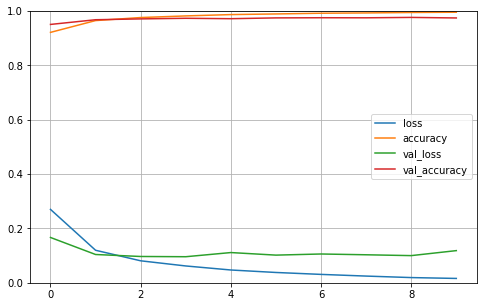

In [26]:
result_201 = fit(model=model_201, X=X_train_scaled, y=y_train_encoded, X_val=X_test_scaled, y_val=y_test_encoded, epochs=10)

In [27]:
y_pred = model_201.predict(test_scaled)
save_file(test_scaled, y_pred, "submission201.csv")

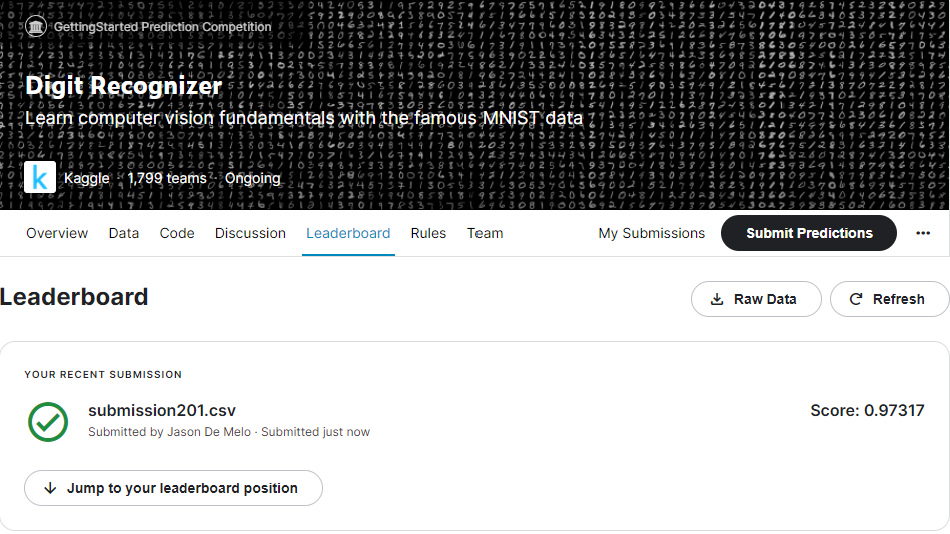

In [28]:
result_201['Test Accuracy (Kaggle)'] = 0.97317
Image("submission201.png")

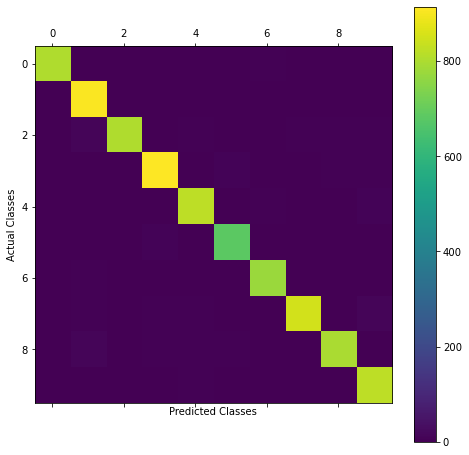

In [29]:
# Confusion matrix
evaluate(model_201, X_test_scaled, y_test_encoded)

#### 1 Input layer (300 nodes), 1 hidden layer (200 nodes), 1 output layer

In [30]:
model_221 = create(units=[300, 200, 10])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 300)               235500    
                                                                 
 hidden_layer_1 (Dense)      (None, 200)               60200     
                                                                 
 output_layer (Dense)        (None, 10)                2010      
                                                                 
Total params: 297,710
Trainable params: 297,710
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
1050/1050 [==============================] - 7s 6ms/step - loss: 0.2456 - accuracy: 0.9251 - val_loss: 0.1332 - val_accuracy: 0.9589
Epoch 2/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.1068 - accuracy: 0.9678 - val_loss: 0.1244 - val_accuracy: 0.9646
Epoch 3/10
1050/1050 [==============================] - 6s 5ms/step - loss: 0.0752 - accuracy: 0.9778 - val_loss: 0.1250 - val_accuracy: 0.9685
Epoch 4/10
1050/1050 [==============================] - 6s 5ms/step - loss: 0.0561 - accuracy: 0.9840 - val_loss: 0.1192 - val_accuracy: 0.9714
Epoch 5/10
1050/1050 [==============================] - 6s 5ms/step - loss: 0.0443 - accuracy: 0.9872 - val_loss: 0.1555 - val_accuracy: 0.9680
Epoch 6/10
1050/1050 [==============================] - 6s 5ms/step - loss: 0.0352 - accuracy: 0.9897 - val_loss: 0.1173 - val_accuracy: 0.9758
Epoch 7/10
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0277 - accuracy: 0.9919 - val_loss: 0.1483 - val_accuracy:

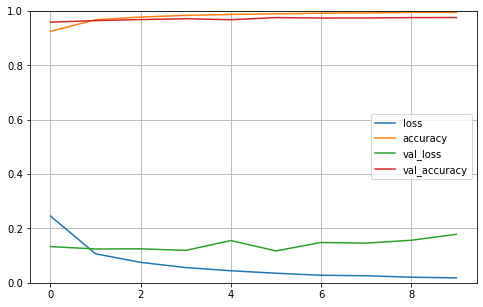

In [31]:
result_221 = fit(model=model_221, X=X_train_scaled, y=y_train_encoded, X_val=X_test_scaled, y_val=y_test_encoded, epochs=10)

In [32]:
y_pred = model_221.predict(test_scaled)
save_file(test_scaled, y_pred, "submission221.csv")

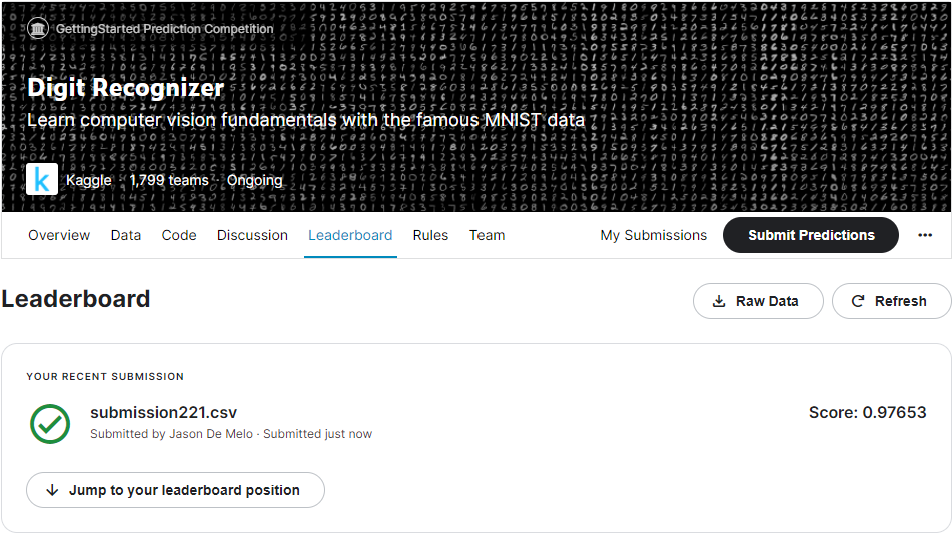

In [33]:
result_221['Test Accuracy (Kaggle)'] = 0.97653
Image("submission221.png")

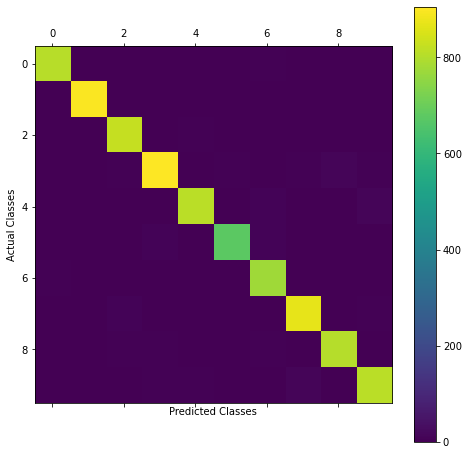

In [34]:
# Confusion matrix
evaluate(model_221, X_test_scaled, y_test_encoded)

#### 1 input layer (784 nodes), 3 hidden layers (500, 300, 100 nodes), 1 output layer

In [35]:
model_300 = create(units=[784, 500, 300, 100, 10])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 784)               615440    
                                                                 
 hidden_layer_1 (Dense)      (None, 500)               392500    
                                                                 
 hidden_layer_2 (Dense)      (None, 300)               150300    
                                                                 
 hidden_layer_3 (Dense)      (None, 100)               30100     
                                                                 
 output_layer (Dense)        (None, 10)                1010      
                                                                 
Total params: 1,189,350
Trainable params: 1,189,350
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
1050/1050 [==============================] - 10s 8ms/step - loss: 0.2821 - accuracy: 0.9158 - val_loss: 0.1704 - val_accuracy: 0.9526
Epoch 2/10
1050/1050 [==============================] - 9s 9ms/step - loss: 0.1466 - accuracy: 0.9615 - val_loss: 0.1560 - val_accuracy: 0.9612
Epoch 3/10
1050/1050 [==============================] - 7s 7ms/step - loss: 0.1267 - accuracy: 0.9708 - val_loss: 0.2017 - val_accuracy: 0.9662
Epoch 4/10
1050/1050 [==============================] - 8s 7ms/step - loss: 0.1134 - accuracy: 0.9743 - val_loss: 0.1554 - val_accuracy: 0.9686
Epoch 5/10
1050/1050 [==============================] - 9s 9ms/step - loss: 0.1090 - accuracy: 0.9779 - val_loss: 0.2133 - val_accuracy: 0.9687
Epoch 6/10
1050/1050 [==============================] - 8s 7ms/step - loss: 0.0953 - accuracy: 0.9812 - val_loss: 0.3828 - val_accuracy: 0.9549
Epoch 7/10
1050/1050 [==============================] - 8s 8ms/step - loss: 0.0996 - accuracy: 0.9810 - val_loss: 0.2581 - val_accuracy

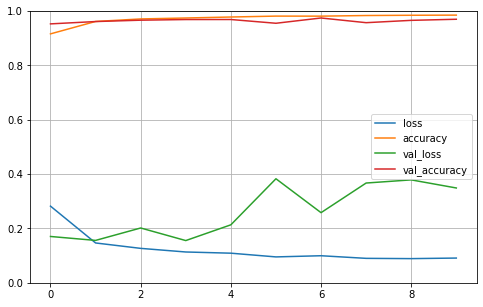

In [36]:
result_300 = fit(model=model_300, X=X_train_scaled, y=y_train_encoded, X_val=X_test_scaled, y_val=y_test_encoded, epochs=10)

In [37]:
y_pred = model_300.predict(test_scaled)
save_file(test_scaled, y_pred, "submission300.csv")

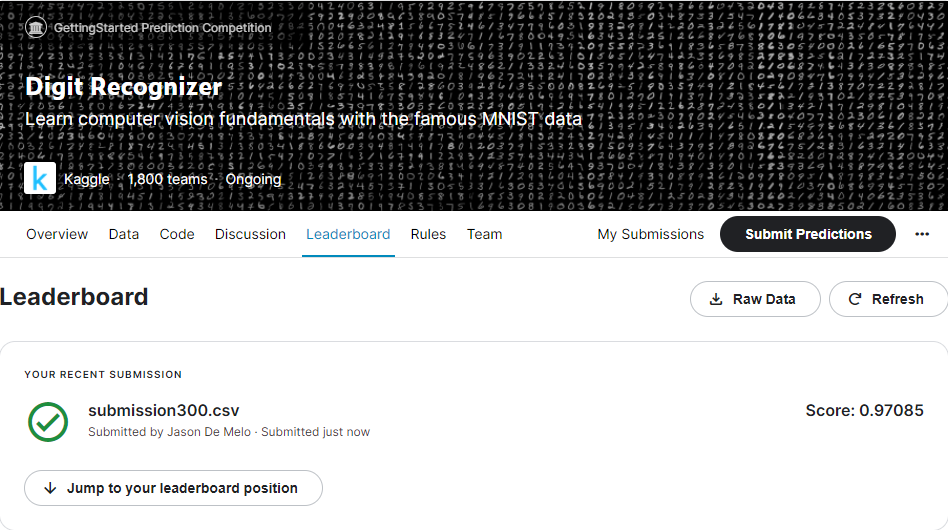

In [38]:
result_300['Test Accuracy (Kaggle)'] = 0.97085
Image("submission300.png")

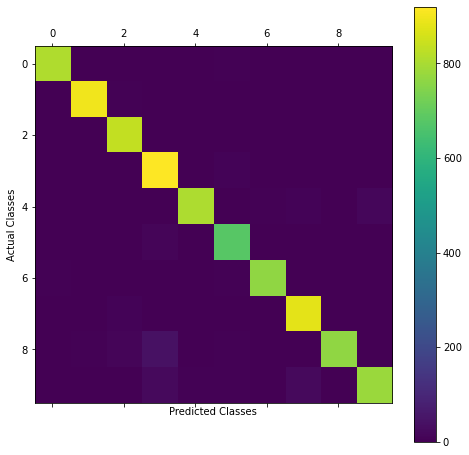

In [39]:
# Confusion matrix
evaluate(model_300, X_test_scaled, y_test_encoded)

## Conclusion

In [40]:
results = [result_101, result_121, result_201, result_221, result_300]
df_results = pd.DataFrame(results)
df_results['name'] = ['1 input layer (128 nodes), 1 output layer',
                      '1 input layer (300 nodes), 1 hidden layer (128 nodes), 1 output layer',
                      '1 input layer (300 nodes), 1 output layer',
                      '1 input layer (300 nodes), 1 hidden layer (200 nodes), 1 output layer',
                      '1 input layer (784 nodes), 3 hidden layers (500, 300, 100 nodes), 1 output layer']
df_results.set_index('name', inplace=True)
df_results

,Layers,Nodes,Time,Training Accuracy,Validation Accuracy,Test Accuracy (Kaggle)
name,,,,,,
"1 input layer (128 nodes), 1 output layer",2,128,62.58,0.9913,0.9727,0.97107
"1 input layer (300 nodes), 1 hidden layer (128 nodes), 1 output layer",3,128,66.48,0.9953,0.9776,0.97492
"1 input layer (300 nodes), 1 output layer",2,300,53.74,0.9955,0.9744,0.97317
"1 input layer (300 nodes), 1 hidden layer (200 nodes), 1 output layer",3,200,60.84,0.9949,0.9760,0.97653
"1 input layer (784 nodes), 3 hidden layers (500, 300, 100 nodes), 1 output layer",5,500,91.37,0.9849,0.9696,0.97085


Adding more layers can improve the model. More nodes can improve as well. But, apparently adding an excessive number of layers and nodes doesn't necessarily means a better model. In the table above, the last model has several layers and nodes, but the accuracy was not better than other models with less layers and nodes.<br><br>
<b>Adding too many layers and nodes seem to overfit the model.</b><br><br>
The best models I tested did have 1 hidden layer, and the results were very close. Testing in Kallge, the best accuracy was obtained with model that has <u>one input layer with 300 nodes, one hidden layer with 200 nodes and the output layer</u>.